In [1]:
import pandas as pd # importa a biblioteca pandas
import numpy as np #importa a biblioteca numpy

In [2]:
dados = pd.read_json(path_or_buf='imoveis.json',orient='columns') # importa os dados

In [3]:
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


In [4]:
dados.ident[0] #exibe a primeira linha



{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [5]:
dados.listing[0] #lista os dados da primeira linha

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

In [6]:
# Pré processamento dos dados
#Função normalize
dados_lista1 = pd.json_normalize(dados.ident) # serve para transformar os dados em tabela
dados_lista1.head() #exibe as primeiras linhas do dataframe

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [7]:
dados_lista2=pd.json_normalize(dados.listing,sep='_') # serve para transformar os dados em tabela
dados_lista2.head() #exibe as primeiras linhas do dataframe

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


In [8]:
# Junção dos dataframes
dados_imoveis= pd.concat([dados_lista1,dados_lista2],axis=1) # junta os dois dataframes

In [9]:
dados_imoveis.head() 

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [10]:
dados_imoveis.shape #exibe as dimensoes do dataframe

(73615, 21)

In [11]:
for coluna in dados_imoveis.columns: # for para printar as colunas do dataframe
    print('---- '*10)
    print(dados_imoveis[coluna].value_counts())


---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
customerID
775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: count, Length: 73615, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 


source
Website    73615
Name: count, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
types_unit
Apartamento    59106
Casa            9389
Outros          5120
Name: count, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
types_usage
Residencial    69596
Comercial       4019
Name: count, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
address_city
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: count, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
address_location_lon
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: count, Length: 25753, dtype: int64
---- ---- ---- ---- ---- ---- ---- ---- ---- ---- 
address_location_lat
-23.000371    399
-23.01747

In [12]:
#Pré processamento dos dados
#aplicando filtros no dataset
filtro = (dados_imoveis['types_usage']== 'Residencial' )& (dados_imoveis['address_city']== 'Rio de Janeiro') # aplicando filtro no dataseet
dados_imoveis= dados_imoveis[filtro] 
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


In [13]:
dados_imoveis.info() # verificando as informações dos dados

<class 'pandas.core.frame.DataFrame'>
Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  features_su

In [14]:
# resetando index
dados_imoveis.reset_index(drop= True, inplace = True)  #reseta o index, para que as informações passem a ser ordenadas corretamente

In [15]:
dados_imoveis.info(verbose= False) # comando para exibir somente os indices sem exibir o conteudo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


In [16]:
#transformação dos tipos de dados 
dados_imoveis = dados_imoveis.astype({

    'prices_price':'float64',
    'prices_tax_iptu':'float64',
    'prices_tax_condo':'float64',
    'features_usableAreas':'int64',
    'features_totalAreas':'int64'
}
)
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

In [17]:
# Lidando com dados nulos
dados_imoveis.address_zone.value_counts()

address_zone
Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: count, dtype: int64

In [18]:
dados_imoveis['address_zone']=dados_imoveis['address_zone'].replace('',np.nan) #substituição dos valores vazios por nan

In [19]:
dados_imoveis['address_zone'].isnull().sum() # realizando a soma dos valores vazios

149

In [20]:
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [21]:
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset=['address_neighborhood']).to_dict('records') # remove valores duplicados
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [22]:
dic_zonas = {dic['address_neighborhood']:dic['address_zone']for dic in dici} #criando dicionario para associar
# bairros e zonas


In [23]:
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [24]:
#associando o bairro com a zona
for bairro, zona in dic_zonas.items(): 
    dados_imoveis.loc[dados_imoveis['address_neighborhood']==bairro,'address_zone']= zona

In [25]:
dados_imoveis.head() # exibindo as primeiras linhas

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000.0,...,150.0,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000.0,...,120.0,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000.0,...,100.0,0,0,0,0,132,132,0,0,0
3,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000.0,...,400.0,3,2,1,1,60,0,3,4,2
4,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000.0,...,0.0,0,0,0,0,200,200,0,0,0


In [26]:
dados_imoveis['address_zone'].isnull().sum() # verificando se ainda tem valores faltantes

0

In [27]:
#verificando se tem outros valores faltantes nas outras colunas
dados_imoveis.prices_tax_condo.isnull().sum()

6061

In [28]:
#verificando se tem outros valores faltantes nas outras colunas
dados_imoveis.prices_tax_iptu.isnull().sum()

8725

In [29]:
#Corrigindo os valores faltantes
dados_imoveis.prices_tax_iptu.fillna(0,inplace = True) # função para substituir os valores vazios
dados_imoveis.prices_tax_condo.fillna(0,inplace = True) #função para substituir os valores vazios
print(f"Total de prices nulos: {dados_imoveis.prices_tax_iptu.isnull().sum()}")
print(f"Total de prices nulos: {dados_imoveis.prices_tax_condo.isnull().sum()}")

Total de prices nulos: 0
Total de prices nulos: 0


In [30]:
#Remove colunas nao uteis para criar o modelo
dados_imoveis.drop(['customerID','source','types_usage','address_city',
                    'address_location_lon','address_location_lat','address_neighborhood'],axis=1, inplace= True)

In [31]:
#criando dicionario para renomear as colunas
dic_colunas={
    'types_unit':'unit','address_zone': 'zone','prices_price':'price',
    'prices_tax_condo':'tax_condo','prices_tax_iptu':'tax_iptu','features_bedrooms':'bedrooms',
    'features_bathrooms':'bathrooms','features_suites':'suites','features_parkingSpaces':'parkingSpaces',
    'features_usableAreas':'usableAreas', 'features_totalAreas':'totalAreas', 'features_floors':'floors',
    'features_unitsOnTheFloor': 'unitsOnTheFloor','features_unitFloor':'unitFloor'
}

In [32]:
#renomeando as colunas
dados_imoveis= dados_imoveis.rename(dic_colunas, axis =1) #renomeia as colunas conforme o dicionario criado

In [33]:
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [34]:
col_n = dados_imoveis.select_dtypes(include=['number']) # selecionando apenas colunas com numeros



In [35]:
correlacao= col_n.corr()

In [36]:
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

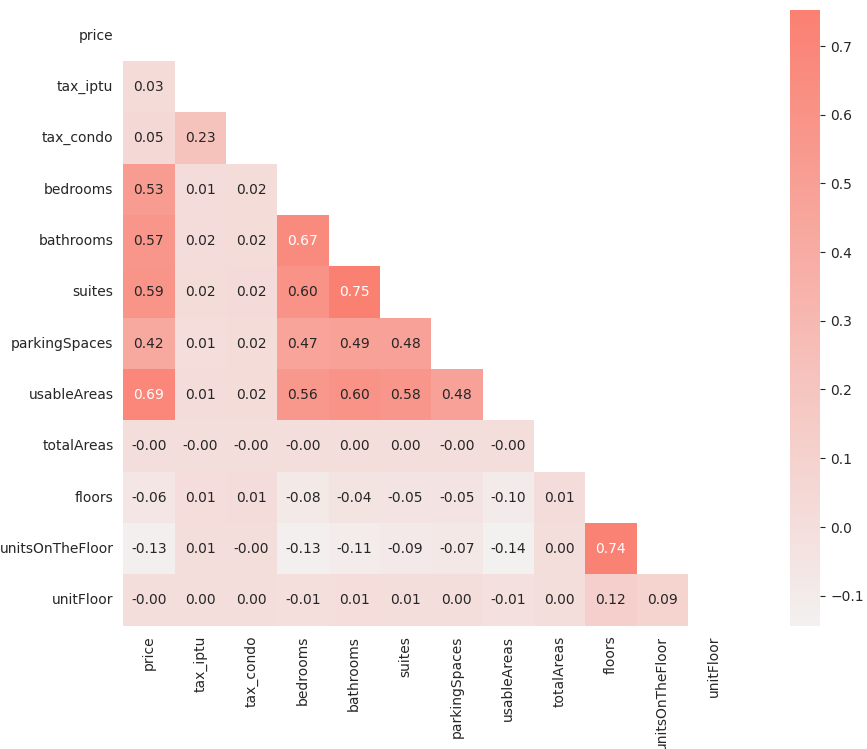

In [ ]:
#Visualização das correlações
cores = sns.color_palette('light:salmon', as_cmap = True) # personalização das cores
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f,ax= plt.subplots(figsize=(13,8))
    ax = sns.heatmap(correlacao, cmap=cores, mask = mask, square = True, fmt = '.2f',annot = True)

<Axes: >

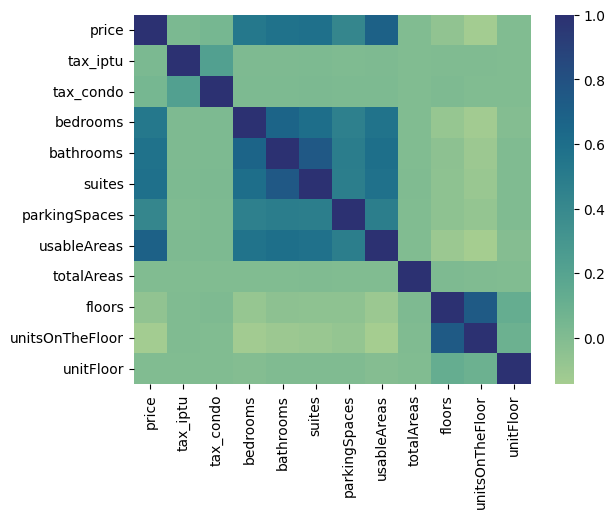

In [ ]:
sns.heatmap(correlacao, cmap='crest')

<Axes: >

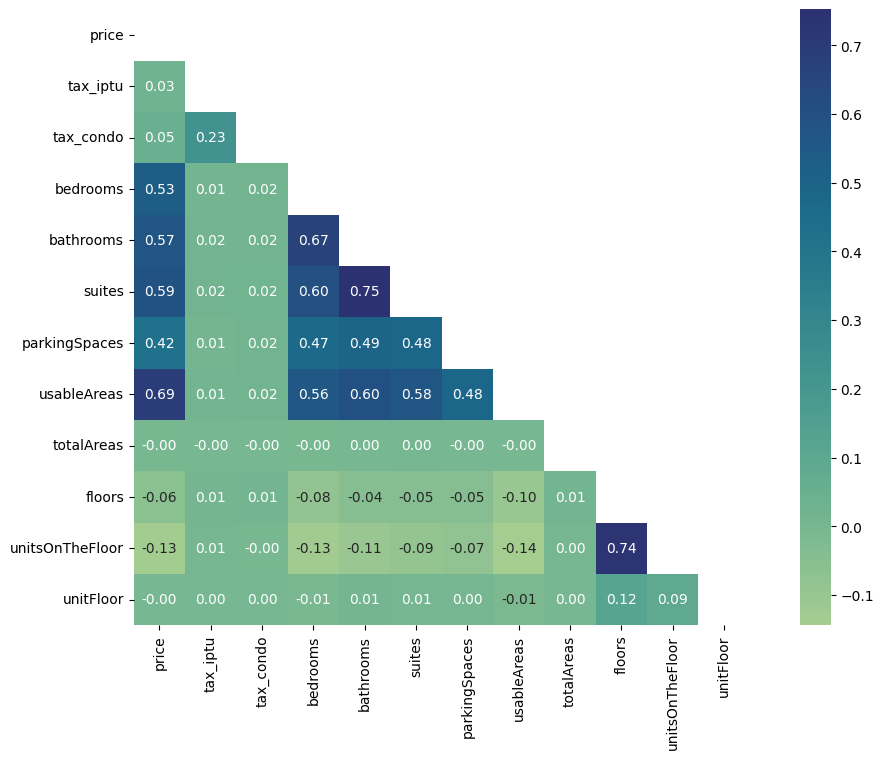

In [ ]:
plt.figure(figsize=(13,8))
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap='crest', mask = mask, square = True, fmt = '.2f',annot = True)

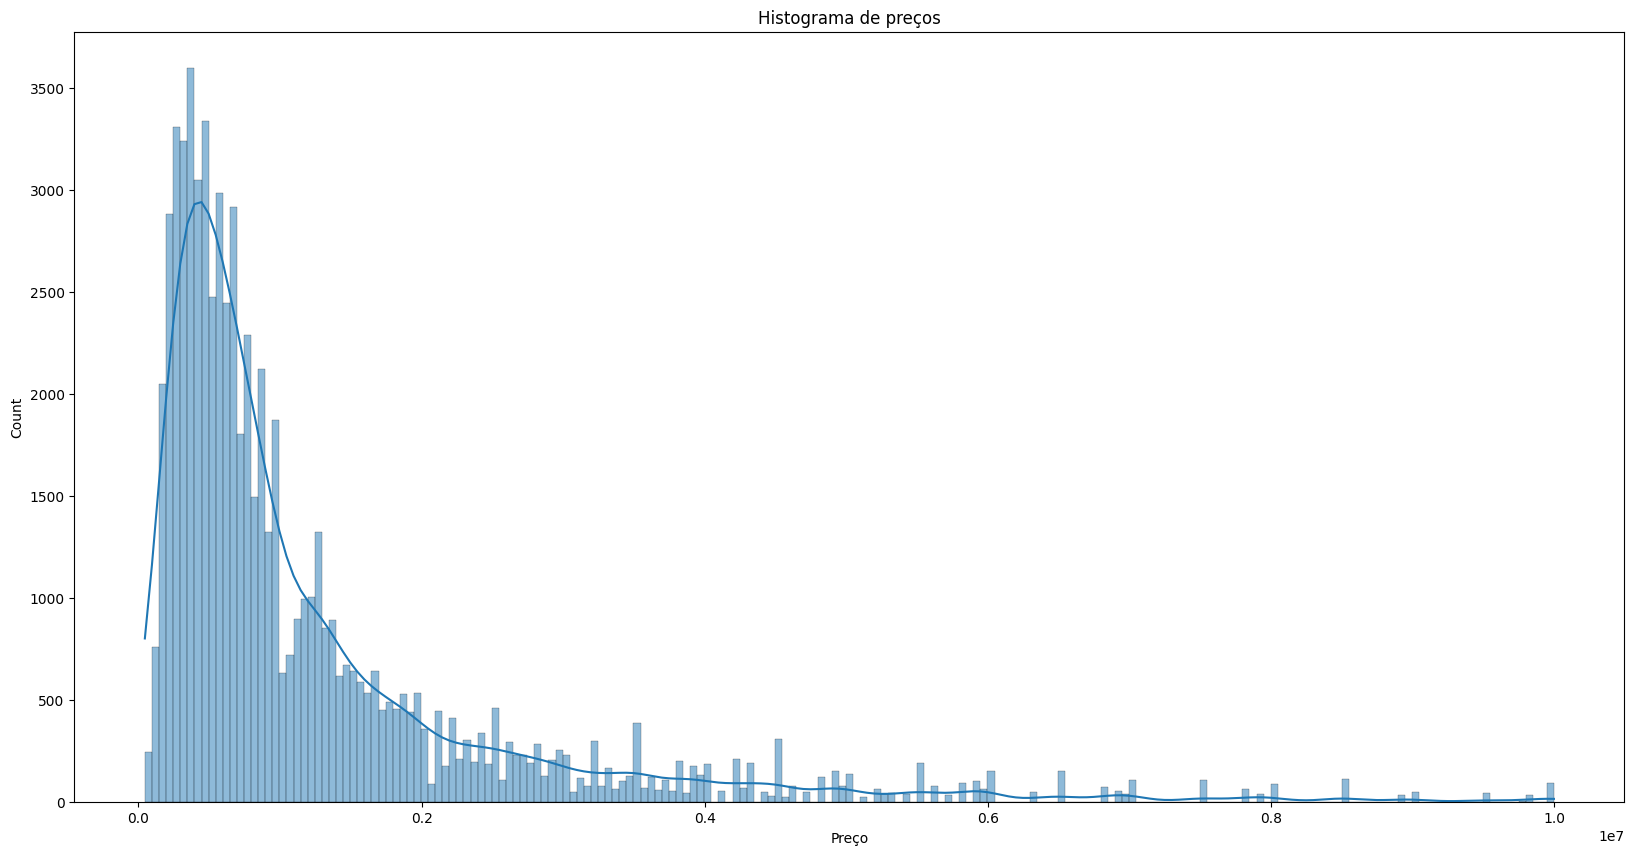

In [ ]:
ax = sns.histplot(data = dados_imoveis, x ='price', kde= True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preços')
ax.set_xlabel('Preço');

Transformação das variáveis
Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:

Lembrar de realizar a transformação inversa para obter o valor original:

Para mais detalhes consultar as documentações log1p, expm1 e FunctionTransformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer #importar metodo para realizar a transformação dos dados

In [ ]:
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object'])) #exclui dados que não sao numéricos

c:\Users\Eng. Daniel Vieira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [ ]:
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


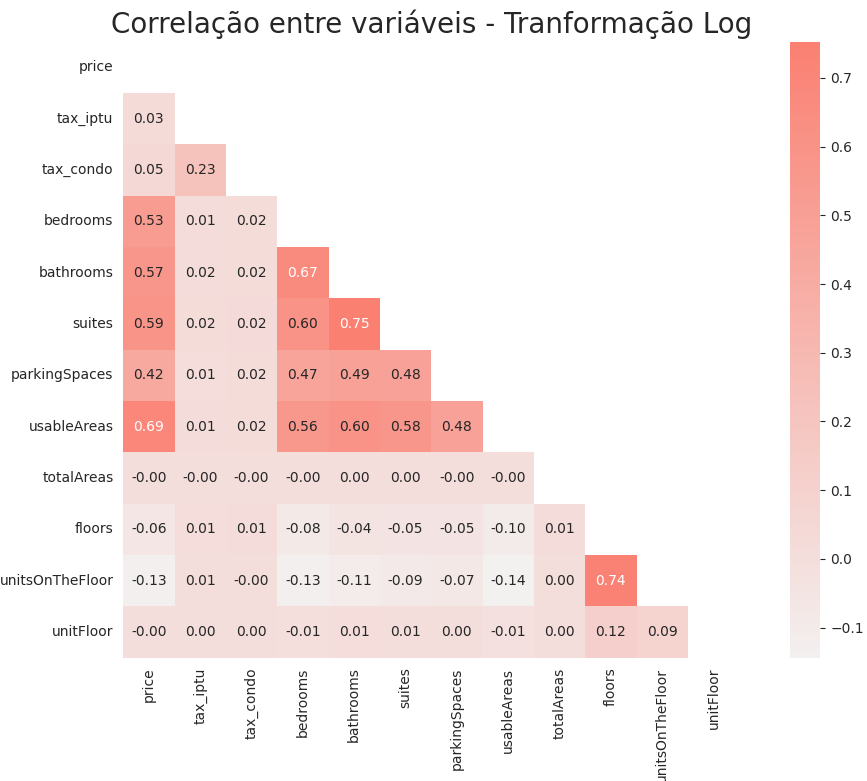

In [ ]:
#depois da transformação
col_n = dados_imoveis.select_dtypes(include=['number']) # selecionando apenas colunas com numeros
correlacao_transformado = col_n.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

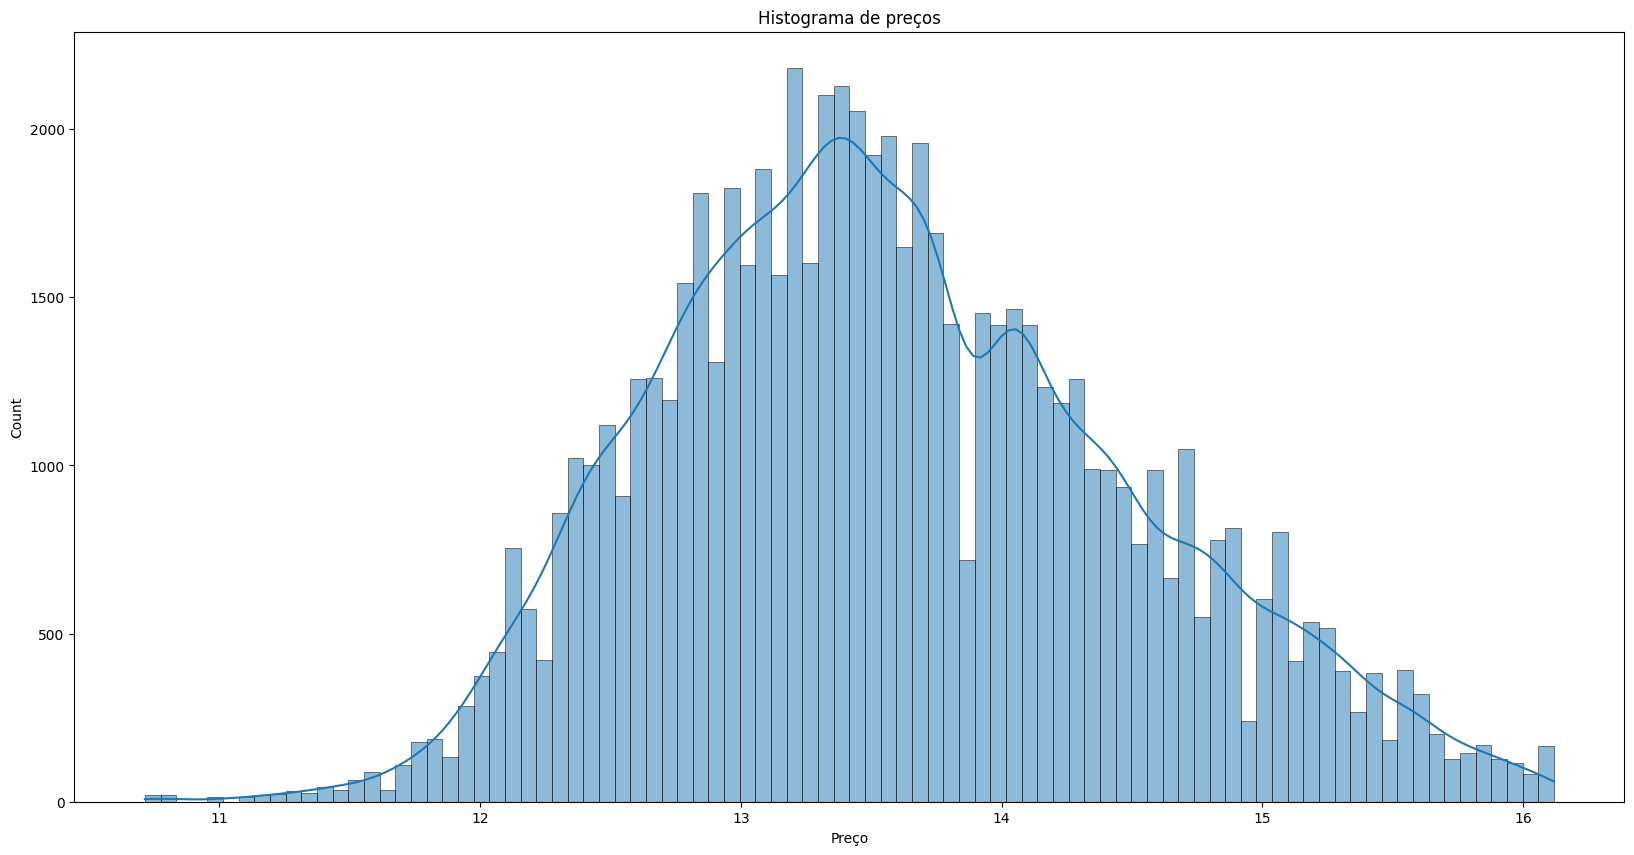

In [ ]:
#depois (distrib. simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

In [ ]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns #variaveis categóricas

In [ ]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas]) # cria uma nova coluna com variaveis categóricas
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,False,False,True,False,False,True,False
1,True,False,False,False,False,True,False
2,False,False,True,False,False,True,False
3,True,False,False,False,False,True,False
4,False,False,True,False,False,True,False


In [ ]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1) 
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,False,False,True,False,False,True,False
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,True,False,False,False,False,True,False
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,False,False,True,False,False,True,False


Ajustes e previsão

In [ ]:
#Ajuste e previsao
#variáveis explanatórias (independentes)
X = dados_imoveis_dummies.drop('price', axis=1)

#variável dependente / Variavel dependente
y = dados_imoveis_dummies['price']

In [ ]:
from sklearn.model_selection import train_test_split #Dividir o conjunto de dados para treino e teste

In [ ]:
#divisão em conjunto de treino e teste
#random_state - estado de aleatoriedade
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42) #função para dividir o conjunto de dados

In [ ]:
from sklearn.linear_model import LinearRegression # importa o modelo de regressao linear


In [ ]:
#Instanciando o modelo
lr = LinearRegression()

In [ ]:
#treino
lr.fit(X_treino, y_treino) #treino do modelo

LinearRegression()

In [ ]:
#teste
previsao_lr = lr.predict(X_teste)

In [ ]:
X_teste

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
33540,7.496097,7.170888,1.098612,1.098612,0.693147,0.693147,4.430817,4.430817,2.302585,1.945910,1.791759,True,False,False,False,False,True,False
4026,0.693147,5.707110,1.098612,0.693147,0.000000,0.693147,4.007333,0.000000,1.791759,2.302585,0.000000,True,False,False,False,False,True,False
14411,4.330733,6.398595,0.693147,0.693147,0.000000,0.000000,3.663562,3.663562,2.564949,1.609438,2.079442,True,False,False,False,False,False,True
47351,8.331105,7.090910,1.609438,1.098612,0.693147,1.098612,5.099866,5.099866,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
42009,0.000000,0.000000,1.098612,1.098612,0.693147,0.693147,4.418841,4.418841,0.000000,0.000000,0.000000,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52215,6.167516,7.318540,1.386294,0.693147,0.693147,0.693147,4.787492,4.836282,0.000000,0.000000,0.000000,True,False,False,False,False,False,True
29231,7.341484,7.170888,1.386294,1.386294,0.693147,1.098612,4.905275,4.905275,0.000000,0.000000,0.000000,True,False,False,False,True,False,False
30745,5.017280,6.746412,1.098612,1.098612,0.693147,0.693147,4.276666,4.276666,0.000000,0.000000,0.000000,True,False,False,False,True,False,False
2188,0.000000,5.351858,1.098612,0.693147,0.000000,0.693147,3.912023,3.912023,0.000000,0.000000,0.000000,True,False,False,False,True,False,False


In [ ]:
np.expm1(7.49)

1789.0520918436703

In [ ]:
dados_imoveis.head(5)

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


In [ ]:
#resultados da previsão
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [ ]:
np.expm1(12.45)

255249.32262933443

In [ ]:
np.expm1(13.13161073)

504644.1207307838

In [ ]:
#transformação inversa 
np.expm1(13.25768024)

572448.7513552749

2.4 - Métrica de desempenho
Coeficiente de Determinação
descobrir quão “bem” uma linha de regressão amostral é adequada aos dados
r2 situa-se entre 0 e 1
"r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão."

In [ ]:
#importar a biblioteca para calcular a métrica r2_score
from sklearn.metrics import r2_score 

In [ ]:
r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.7880682093407632

Extra
Documentação Sklearn - Métricas para Regressão

Observação: Estas métricas dependem da escala dos dados!!!

MSE (Mean Squared Error ou Erro Quadrático Médio): média da diferença elevada ao quadrado entre o valor real e o previsto. (penalidade sobre o erro)

MAE (Mean Absolute Error ou Erro Absoluto Médio): média da diferença absoluta (módulo) entre o valor real e o previsto.

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

In [ ]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]

mean_squared_error(y_true, y_pred, squared=True)


0.7083333333333334

In [ ]:
from sklearn.metrics import mean_squared_error

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]

mean_squared_error(y_true, y_pred, squared=False)

0.8227486121839513

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_absolute_percentage_error(y_true, y_pred)


0.3273809523809524

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_teste, previsao_lr)
mape

0.022975801844755322

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste, previsao_lr)
mse

0.17351220044092464

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)


0.375

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_percentage_error(y_true, y_pred)

0.3273809523809524

In [ ]:
#arvore de decisão para regressao
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Instanciando o modelo
dtr = DecisionTreeRegressor(random_state=42,max_depth=5) #random_state garante que a estrutura da árvore será reprodutivel
#max_depth define o tamanho da arvore


In [ ]:
#treino
dtr.fit(X_treino,y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
#teste
previsao_dtr = dtr.predict(X_teste)

In [ ]:
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

In [ ]:
np.expm1(13.55136531)

767861.0011640199

In [ ]:
pip install yellowbrick

In [ ]:
from yellowbrick.regressor import PredictionError

c:\Users\Eng. Daniel Vieira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


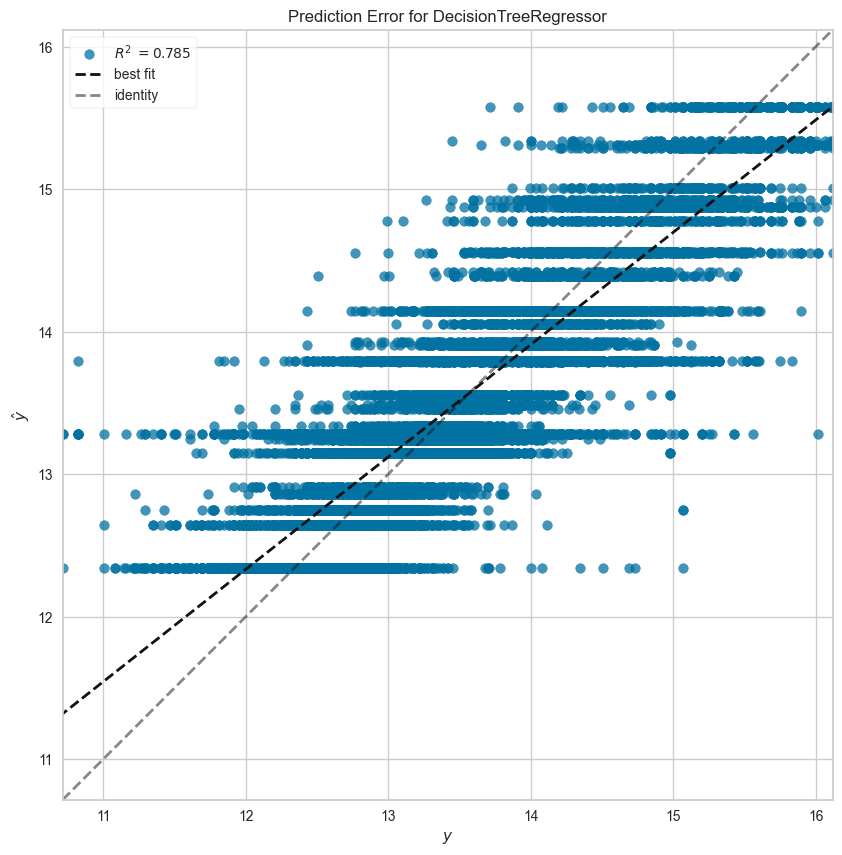

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
pev = PredictionError(dtr)
pev.fit(X_treino,y_treino)
pev.score(X_teste,y_teste)
pev.poof()

In [ ]:
#Metrica
r2_dtr = r2_score(y_teste,previsao_dtr)
r2_dtr

0.7846916218477392

Parâmetros Decision Tree Regressor
n_estimators: quantidade de arvores na floresta
bootstrap: define se será utilizado o metódo estatístico de amostragem bootstrap
oob_Score: define se será utilizado o método de amostragem out of bag para mensurar os erros da predição
n_jobs: número de jobs rodando paralelamente (computação paralela - processadores)
warm_start: faz a adequação de uma nova floresta ou usa uma floresta existente
max_samples: para o caso do bootstrap ser True, define o número de amostras a serem extraídas de X, para treinar
cada arvore base

In [ ]:
#Metódo Ensemble
#Random Forest
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [ ]:
rf.fit(X_treino,y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [ ]:
previsao_rf = rf.predict(X_teste)

In [ ]:
previsao_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

In [ ]:
np.expm1(13.53707348)

756964.8960866113

In [ ]:
from yellowbrick.regressor import PredictionError

c:\Users\Eng. Daniel Vieira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


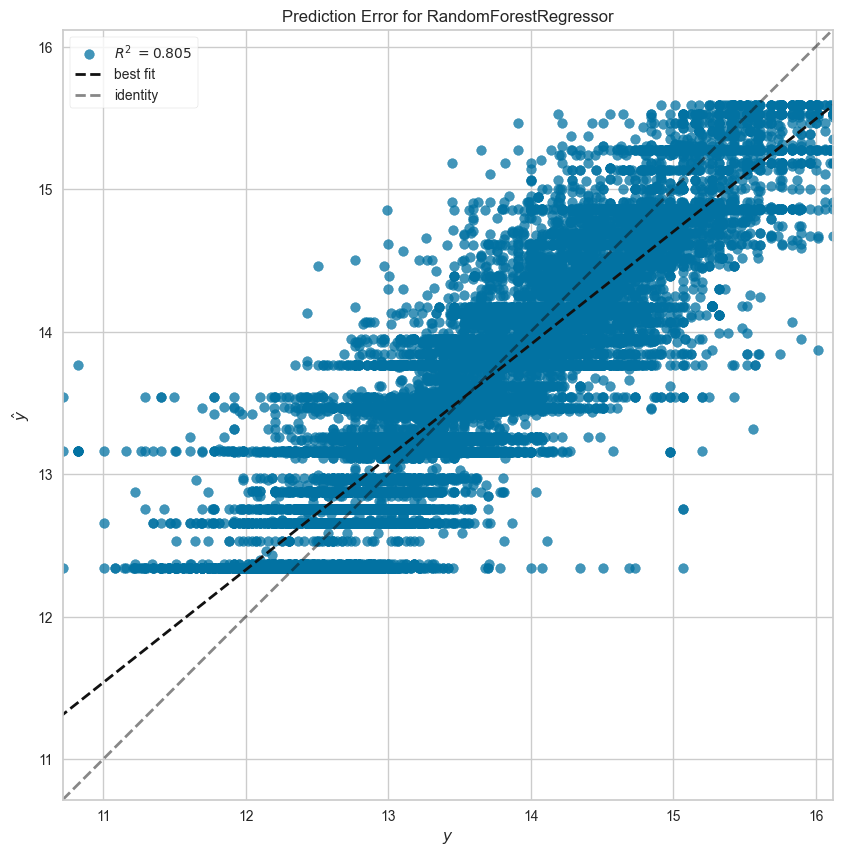

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(rf)
pev.fit(X_treino,y_treino)
pev.score(X_teste, y_teste)
pev.poof()

In [ ]:
#Metricas de desempenho
r2_rf = r2_score(y_teste,previsao_rf)
r2_rf

0.805273364453047

In [ ]:
metricas_modelo_ML = pd.DataFrame({
    'Modelo': ['Regressao Linear', 'Árvore de decisão','Random Forest'],
     'Metricas': ['R2','MSE','MAE']
})

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
def obter_metrica(modelo, X_teste, y_teste, nome):
    predict = modelo.predict(X_teste)
    df_metricas = pd.DataFrame({
        'R2':[r2_score(y_teste,predict)],
        'MSE':[mean_squared_error(y_teste,predict)],
        'MAE':[mean_absolute_error(y_teste,predict)]
    },index=[nome])
    return df_metricas

In [ ]:
def tabela_metricas(modelo_reg_linear, modelo_dt, modelo_rf, X_teste, y_teste):
    df_metricas_reg_linear = obter_metrica(modelo_reg_linear, X_teste, y_teste, 'Linear Regression')
    df_metricas_dt = obter_metrica(modelo_dt, X_teste, y_teste, 'Decision Tree Regression')
    df_metricas_rf = obter_metrica(modelo_rf, X_teste, y_teste, 'Random Forest Regression')

    return pd.concat([df_metricas_reg_linear, df_metricas_dt, df_metricas_rf])

In [ ]:
tabela_metricas(lr, dtr, rf, X_teste, y_teste)

,R2,MSE,MAE
Linear Regression,0.788068,0.173512,0.312049
Decision Tree Regression,0.784692,0.176277,0.312601
Random Forest Regression,0.805273,0.159426,0.298641


In [ ]:
metricas_modelo_ML.head()

,Modelo,Metricas
0,Regressao Linear,R2
1,Árvore de decisão,MSE
2,Random Forest,MAE
